<a href="https://colab.research.google.com/github/Abha2003/sms_spam_detection/blob/main/SMS_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Module**

In [ ]:
import numpy as np
import pandas as pd


# **Loading the Dataset**

In [ ]:
msg=pd.read_csv('spam.csv',encoding='latin-1')
msg.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
msg.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
msg.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# **Preprocessing the Data**

In [ ]:
msg.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# **Input Split**

In [ ]:
msg=msg.drop(["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"],axis=1)
msg.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
msg=msg.rename(columns={"v1":"label","v2":"text"})
msg.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("no. of rows",len(msg))

no. of rows 5572


In [ ]:
msg.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
msg.text.value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [ ]:
msg['length']=msg['text'].apply(len)
msg.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# **Exploratory Data Analysis**

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

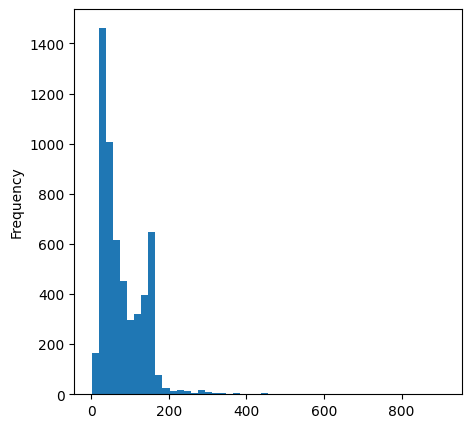

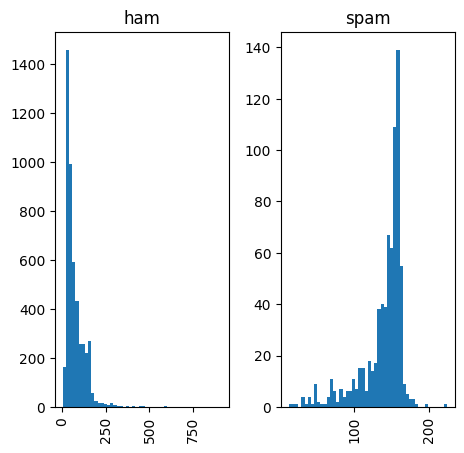

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sms
msg['length'].plot(bins=50,kind='hist',figsize=(5,5))
msg.hist(column='length',by='label',bins=50,figsize=(5,5))

In [ ]:
msg['label'] = msg['label'].astype('category')
msg['label'] = msg['label'].cat.codes
msg

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


# **Model Training**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
input=['I gotta collect da car at 6 lei.']

text=vectorizer.fit_transform(msg['text'])

x_train, x_test, y_train, y_test = train_test_split(text, msg['label'], test_size=0.20, random_state=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


##  SVC

In [ ]:
from sklearn.svm import SVC

model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVC")
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction))
print("Recall score:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))

SVC
Accuracy score: 0.9874439461883409
Precision score: 0.9921259842519685
Recall score: 0.9064748201438849
F1 score: 0.9473684210526315


## MultinomialNB


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(" MultinomialNB")
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction))
print("Recall score:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))


 MultinomialNB
Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1 score: 0.9160839160839161


## BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model=BernoulliNB()
model.fit(x_train,y_train)



BernoulliNB()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("BernoulliNB")
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction))
print("Recall score:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))


BernoulliNB
Accuracy score: 0.9865470852017937
Precision score: 0.984375
Recall score: 0.9064748201438849
F1 score: 0.9438202247191011


##  MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train,y_train)

MLPClassifier()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLPClassifier")
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction))
print("Recall score:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))


MLPClassifier
Accuracy score: 0.9937219730941704
Precision score: 1.0
Recall score: 0.9496402877697842
F1 score: 0.974169741697417


##  LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("LogisticRegression")
print("Accuracy score:", accuracy_score(y_test, prediction))
print("Precision score:", precision_score(y_test, prediction))
print("Recall score:", recall_score(y_test, prediction))
print("F1 score:", f1_score(y_test, prediction))

LogisticRegression
Accuracy score: 0.9901345291479821
Precision score: 0.9776119402985075
Recall score: 0.9424460431654677
F1 score: 0.9597069597069599


## Performance Comparison

In [94]:
clfs = {
    'Support Vector Machine': SVC(probability=True),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Multi-Layer Perceptron Classifier': MLPClassifier(),
    'LogisticRegression': LogisticRegression()
  }

In [95]:
performance_msg = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for name, clf in clfs.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

clf_metrics = pd.DataFrame({
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

performance_msg = pd.concat([performance_msg, clf_metrics], ignore_index=True)



In [96]:
performance_msg = performance_msg.sort_values(by='Accuracy', ascending=False)
print(performance_msg)

   Accuracy  Precision    Recall  F1 Score
0  0.990135   0.977612  0.942446  0.959707


In [ ]:
model.predict(input)

array([0], dtype=int8)

In [ ]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
info=msg['text']
input="U dun say so early hor... U c already then say"

In [ ]:
info

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
info.loc[len(info.index)]="U dun say so early hor... U c already then say"

In [ ]:
info

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572       U dun say so early hor... U c already then say
Name: text, Length: 5573, dtype: object

In [ ]:
text=vectorizer.fit_transform(info)
text

<5573x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73924 stored elements in Compressed Sparse Row format>

In [ ]:
input=text[5572]
model.predict(input)

array([0], dtype=int8)